In [25]:
#std libs imports
from datetime import datetime

#ext libs imports
import numpy as np
import librosa
from librosa import display
from matplotlib import pyplot as plt

#jupyter libs imports
import IPython

In [2]:
def draw_comp_signals(signal1, signal2, sr, no_img=-1):
    n = len(signal1)
    fig = plt.figure(figsize=(10, 2))
    plt.plot(np.linspace(0, 1.0/(2.0*(1/sr)), n).astype(int), signal1,)
    plt.plot(np.linspace(0, 1.0/(2.0*(1/sr)), n).astype(int), signal2,)
    plt.xlabel = 'time, ms'
    plt.ylabel = 'amplitude, '
    plt.savefig(f'sig_comp_{no_img}.png')
    plt.close()
    return fig

In [3]:
def draw_signal(signal, sr):
    n = len(signal)
    fig = plt.figure(figsize=(10, 2))
    plt.plot(np.linspace(0, 1.0/(2.0*(1/sr)), n).astype(int), signal)
    plt.xlabel = 'time, ms'
    plt.ylabel = 'amplitude, '
    plt.savefig(f'sig.png')
    plt.close()
    return fig

In [4]:
file_1, file_2 = '0_2_0_2020-06-20T17:19:31.093728.wav', '0_3_0_2020-06-20T17:19:31.093825.wav'

In [5]:
# format date to datetime.timestamp
def get_timestamp(filename):
    timestamp = filename[6:-4]
    return datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S.%f')

In [6]:
# sort files by start time and get their delay in secs,
# return files in asc order of start time, delay and (are files switched?)
def sort_start_time(file_1, file_2):
    ts_1 = get_timestamp(file_1)
    ts_2 = get_timestamp(file_2)
    if ts_1 > ts_2:
        return file_2, file_1, (ts_1 - ts_2).microseconds*1e-6, (False)
    else:
        return file_1, file_2, (ts_2 - ts_1).microseconds*1e-6, (True)

In [7]:
def get_fitted_samples(file_1, file_2):
    file_1, file_2, delay, switch_flag = sort_start_time(file_1, file_2)
    samples1, sr = librosa.load(file_1, sr=None)
    samples1 = samples1[int(delay*sr):]
    samples2, *_ = librosa.load(file_2, sr=None)
    samples2 = samples2[:-int(delay*sr)]
    return samples1, samples2, sr, switch_flag

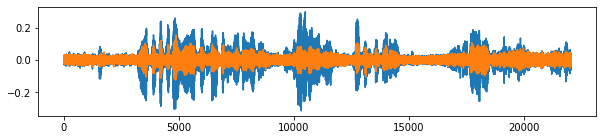

In [8]:
samples1, samples2, sr, switched_flag = get_fitted_samples(file_1, file_2)
draw_comp_signals(samples1, samples2, sr, no_img=-1)

In [ ]:
draw_comp_signals(samples1[100:1000], samples2[100:1000], sr)

In [11]:
# сравнение двух аудио по MSE, подгон аудио, начавшегося первым, ко второму
def get_sync_delay(samples1, samples2, sr, eps_t=1):
    slice_size = int(sr * eps_t)
    slice1 = samples1[:slice_size]
    slice2 = samples2[:slice_size]
    mse_list = []
    for i in range(slice_size)[1:slice_size//2]:
        slice1_temp = slice1[i:]
        slice2_temp = slice2[:-i]
        mse_list.append(np.mean((np.abs(slice1_temp) - np.abs(slice2_temp))**2))
    min_MSE_index = np.argmin(mse_list)
    slice1 = samples1[:slice_size][min_MSE_index:]
    slice2 = samples2[:slice_size]
    return min_MSE_index

In [12]:
delay = get_sync_delay(samples1, samples2, sr, eps_t=0.2)

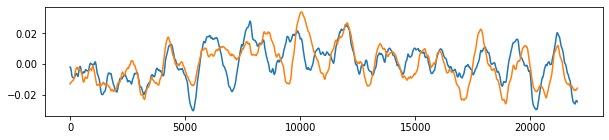

In [13]:
samples1 = samples1[delay:]
samples2 = samples2[:-delay]

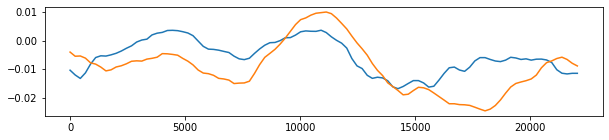

In [44]:
draw_comp_signals(samples1[44100:44200], samples2[44096:44196], sr)

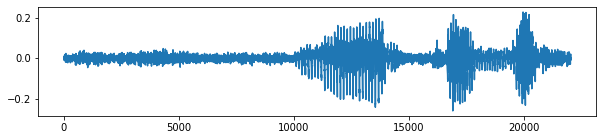

In [52]:
x, y = samples1[44100:88200], samples2[44096:88196]
draw_signal(x-y, sr)

In [53]:
IPython.display.Audio(x, rate=sr)

In [54]:
IPython.display.Audio(y, rate=sr)

In [55]:
IPython.display.Audio(x-y, rate=sr)